In [3]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import pandas as pd

coor_data = pd.read_csv('Data/coordata.csv')
date_data = pd.read_csv('Data/datedata.csv')
meta_data = pd.read_csv('Data/metadata.csv')
bus_stop_data = pd.read_csv('Data/bus_stop.csv')

general = pd.read_csv('Data/ScooterData_July15_Sept27_2019.csv')

data_set = coor_data.join(bus_stop_data.join(date_data.join(meta_data)))

general_np = general.to_numpy()

# data_set = data_set[np.logical_not(np.logical_and(general_np[:, 6] < 0.2, general_np[:, 5] > 60))]
# general_np = general_np[np.logical_not(np.logical_and(general_np[:, 6] < 0.2, general_np[:, 5] > 60))]


Y_data = data_set[['endx', 'endy']].to_numpy()
X_data = data_set.drop(columns=['endx', 'endy','start_date', 'end_near_stop']).to_numpy()

In [7]:
data_set

startx     starty        endx       endy  start_near_stop  \
0      -114.094432  51.038086 -114.087536  51.037255                1   
1      -114.094425  51.034740 -114.076043  51.036427                1   
2      -114.092129  51.035578 -114.076043  51.036427                0   
3      -114.092172  51.057330 -114.089868  51.054822                1   
4      -114.089845  51.043110 -114.071442  51.033083                1   
...            ...        ...         ...        ...              ...   
459473 -114.034679  51.041466 -114.059959  51.038946                1   
459474 -114.034679  51.041466 -114.059959  51.038946                1   
459475 -114.032381  51.042303 -114.059959  51.038946                1   
459476 -114.032380  51.040630 -114.036978  51.042302                1   
459477 -114.032380  51.040630 -114.036978  51.042302                1   

        end_near_stop start_date  start_hour  start_day_of_week  apartment  \
0                   1  7/15/2019           0                  0      17771   
1                   1  7/15/2019           0                  0        235   
2                   1  7/15/2019           0                  0        235   
3                   0  7/15/2019           0                  0       1352   
4                   1  7/15/2019           0                  0      17771   
...               ...        ...         ...                ...        ...   
459473              0  9/27/2019          23                  4        912   
459474              0  9/27/2019          23                  4        912   
459475              0  9/27/2019          23                  4        912   
459476              1  9/27/2019          23                  4        912   
459477              1  9/27/2019          23                  4        912   

        ...  nursing_hm  sing_famly  town_house  twn_na  twn_no_res  \
0       ...           0          71         341       0           5   
1       ...           0         794          13       0           0   
2       ...           0         794          13       0           0   
3       ...           1         991         113       0           0   
4       ...           0          71         341       0           5   
...     ...         ...         ...         ...     ...         ...   
459473  ...           0         840         331       0           0   
459474  ...           0         840         331       0           0   
459475  ...           0         840         331       0           0   
459476  ...           0         840         331       0           0   
459477  ...           0         840         331       0           0   

        twn_occpd  twn_owned  twn_person  twn_uc  twn_vacant  
0             318        114         543       1          16  
1              13          0          26       0           0  
2              13          0          26       0           0  
3             105         55         232       4           4  
4             318        114         543       1          16  
...           ...        ...         ...     ...         ...  
459473        319        236         657       0          12  
459474        319        236         657       0          12  
459475        319        236         657       0          12  
459476        319        236         657       0          12  
459477        319        236         657       0          12  

[459478 rows x 68 columns]

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np

census_by_community = gpd.read_file('Data/census_by_community1.shp')
grid_data = gpd.read_file('Data/ScooterGridId.shp')
data = pd.read_csv('Data/ScooterData_July15_Sept27_2019.csv')

centeroid_scale_grid = np.array([[x.centroid.x, x.centroid.y] for x in grid_data.geometry])
centeroid_scale_grid[:,0] = centeroid_scale_grid[:,0] + 180
# lng_ltd = int(round(max(centeroid_scale_grid[:,0]) - min(centeroid_scale_grid[:,0]), 4) * 100)
# lat_ltd = int(round(max(centeroid_scale_grid[:,1]) - min(centeroid_scale_grid[:,1]), 4) * 100)

lng_ltd = int(round(max(centeroid_scale_grid[:,0]) - min(centeroid_scale_grid[:,0]), 4) * 100)
lat_ltd = int(round(max(centeroid_scale_grid[:,1]) - min(centeroid_scale_grid[:,1]), 4) * 100)

map_mat = np.zeros((lat_ltd,lng_ltd))

max_lng = max(centeroid_scale_grid[:,0])
max_lat = max(centeroid_scale_grid[:,1])

shape = map_mat.shape

for pos in centeroid_scale_grid:
    pos_lng = abs(int(  ((max_lng - pos[0]))*100  )) - 1
    pos_lat = abs(int(  ((max_lat - pos[1]))*100  )) - 1
    map_mat[pos_lat, pos_lng] = 50



In [6]:
len(census_by_community)

306

In [3]:
import progressbar 

# max_lng = max(data_set['endx'])
# max_lat = max(data_set['endy'])

map_end = []
for index, row in progressbar.progressbar(data_set.iterrows()):
    pos_lng = abs(int(  ((max_lng - (row['endx'] + 180) ))*100  )) - 1
    pos_lat = abs(int(  ((max_lat - (row['endy']) ))*100  )) - 1
    map_end.append(map_mat.copy())
    map_end[index][pos_lat, pos_lng] = 255
    map_end[index] = np.fliplr(map_end[index])
    
    
map_end = np.asarray(map_end)  
map_end_re = map_end.reshape(len(map_end), -1)

| |                     #                        | 459477 Elapsed Time: 0:00:48


In [4]:
import progressbar

X_sets_by_day = []
Y_sets_by_day = []
Map_Y_sets_by_day = []

hr = 0
x = []
y = []
map_y = []

compare_hr_before = 0
compare_hr_current = 0
for i in progressbar.progressbar(range(len(X_data))):
    compare_hr_current = data_set['start_hour'][i]
    if (compare_hr_before == 23 and compare_hr_current == 0):
        hr = 0
        X_sets_by_day.append(x)
        Y_sets_by_day.append(y)
        Map_Y_sets_by_day.append(map_y)
        x = []
        y = []
        map_y = []
    compare_hr_before = data_set['start_hour'][i]
    x.append(X_data[i])
    y.append(Y_data[i])
    map_y.append(map_end_re[i])
    if i == (len(X_data) - 1):
        X_sets_by_day.append(x)
        Y_sets_by_day.append(y)
        Map_Y_sets_by_day.append(map_y)

100% (459478 of 459478) |################| Elapsed Time: 0:00:08 Time:  0:00:08


(459478, 1472)

In [18]:
X_train_set = []
Y_train_set = []
Map_Y_train_set = []
for i in progressbar.progressbar(range(48)):
    for j in range(len(X_sets_by_day[i])):
        X_train_set.append(X_sets_by_day[i][j])
        Y_train_set.append(Y_sets_by_day[i][j])
        Map_Y_train_set.append(Map_Y_sets_by_day[i][j])

X_test_set = []
Y_test_set = []
Map_Y_test_set = []
for i in progressbar.progressbar(range(48,len(X_sets_by_day))):
    for j in range(len(X_sets_by_day[i])):
        X_test_set.append(X_sets_by_day[i][j])
        Y_test_set.append(Y_sets_by_day[i][j])
        Map_Y_test_set.append(Map_Y_sets_by_day[i][j])
        
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.callbacks import EarlyStopping

X_train_set = np.asarray(X_train_set)
X_test_set = np.asarray(X_test_set)
scx = MinMaxScaler(feature_range=(0,1))
X_train_set_fit = scx.fit_transform(X_train_set)
X_test_set_fit = scx.transform(X_test_set)

Y_train_set = np.asarray(Y_train_set)
Y_test_set = np.asarray(Y_test_set)
scy = MinMaxScaler(feature_range=(0,1))
Y_train_set_fit = scy.fit_transform(Y_train_set)
Y_test_set_fit = scy.transform(Y_test_set)

Map_Y_train_set = np.asarray(Map_Y_train_set)
Map_Y_test_set = np.asarray(Map_Y_test_set)

# Map_Y_train_set = Map_Y_train_set.reshape(len(Map_Y_train_set), -1)
# Map_Y_test_set = Map_Y_test_set.reshape(len(Map_Y_test_set), -1)

scmap = MinMaxScaler(feature_range=(0,1))
Map_Y_train_set_fit = scmap.fit_transform(Map_Y_train_set)
Map_Y_test_set_fit = scmap.transform(Map_Y_test_set)



100% (48 of 48) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (27 of 27) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [19]:
from tensorflow.keras import layers, Model, regularizers
from tensorflow.python.keras.layers.core import Dense, Activation, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM
from copy import copy



X_train_set_by_day = []
Y_train_set_by_day = []
X_test_set_by_day = []
Y_test_set_by_day = []

inputA = layers.Input(shape=(4))
inputB = layers.Input(shape=(60))

x = Dense(15)(inputA)
x = Dense(30, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)
y = Dense(62)(inputB)
y = Dense(70, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

combined = layers.concatenate([x.output, y.output])

final = Dense(55, activation="relu")(combined)
image = Dense(Map_Y_train_set.shape[1])(final)

xx = Dense(15)(inputA)
xx = Dense(64, activation="relu")(xx)
xx = Model(inputs=inputA, outputs=xx)

yy = Dense(62)(inputB)
yy = Dense(64, activation="relu")(yy)
yy = Model(inputs=inputB, outputs=yy)


combined_twoa = layers.concatenate([xx.output, yy.output])


# xi = Dense(29)(image)
# xi = Dense(30, activation="relu")(xi)
combined_twob = layers.concatenate([combined_twoa, image])

final_two = Dense(55, activation="softmax")(combined_twob)

a = Dense(2)(final_two)

model = Model(inputs=[x.input,y.input], outputs=[a, image])
model.compile(loss="mean_absolute_error", optimizer="adam")

In [20]:
def haversine(coord1: object, coord2: object):
    import math

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 5)
    km = round(km, 5)
    return km

In [29]:
mae_rate_day = mae_rate_day/mae_count_day[0]

In [21]:

x_train_old = []
y_train_old = []


x_train = X_train_set_fit
y_train = Y_train_set_fit
map_y_train = Map_Y_train_set_fit

model.fit([x_train[:,0:4],x_train[:,4:]], [y_train, map_y_train], epochs=50, verbose=2)  

mae_rate_day = np.zeros(7)
mae_count_day = np.zeros(7)
mae_rate_hour = np.zeros(24)
mae_count_hour = np.zeros(24)
error_day_sum = []
for i in range(48,75):
    print('current at: '+str(i))
    x = scx.transform(X_sets_by_day[i])
    y = scy.transform(Y_sets_by_day[i])
    
    map_y = scmap.transform(Map_Y_sets_by_day[i])
    
    X_train_set_fit = np.concatenate((X_train_set_fit, x), axis=0)
    Y_train_set_fit = np.concatenate((Y_train_set_fit, y), axis=0)
    Map_Y_train_set_fit = np.concatenate((Map_Y_train_set_fit, map_y), axis=0)
    
    x_train = X_train_set_fit
    y_train = Y_train_set_fit
    map_y_train = Map_Y_train_set_fit

    ss = model.evaluate([x[:,0:4],x[:,4:]], [y, map_y])

    result_Y = (model.predict([x[:,0:4],x[:,4:]]))[0]
    result_Y_all = scy.inverse_transform(result_Y)
    y_test_all = scy.inverse_transform(y)

    error_all = 0            
    x_tr = scx.inverse_transform(x)
#         for i in (range(len(y_test_all))):
#             error_all = error_all + haversine(result_Y_all[i],y_test_all[i])
#         error_avg = error_all/len(y_test_all)
#         print(round(error_avg, 3))
#         mae_rate_day[day] = mae_rate_day[day] + error_avg
    for dr in range(7):
        mask = np.logical_and(x_tr[:,4] > (dr)-0.2, x_tr[:,4] < (dr+1)-0.2)
        result_Y_d = result_Y_all[mask]
        if len(result_Y_d) > 0:
            Y_test_in = y_test_all[mask]
            error_all = 0
            for i in (range(len(Y_test_in))):
                error_all = error_all + haversine(result_Y_d[i],Y_test_in[i])
            error_avg = error_all/len(Y_test_in)
            mae_rate_day[dr] = mae_rate_day[dr] + error_avg
            mae_count_day[dr] = mae_count_day[dr] + 1

    for hr in range(24):
        mask = np.logical_and(x_tr[:,3] > (hr)-0.2, x_tr[:,3] < (hr+1)-0.2)
        result_Y_d = result_Y_all[mask]
        Y_test_in = y_test_all[mask]
        error_all = 0
        for i in (range(len(Y_test_in))):
            error_all = error_all + haversine(result_Y_d[i],Y_test_in[i])
        error_avg = error_all/len(Y_test_in)
        mae_rate_hour[hr] = mae_rate_hour[hr] + error_avg
        mae_count_hour[hr] = mae_count_hour[hr] + 1

    history = model.fit([x_train[:,0:4],x_train[:,4:]], [y_train, map_y_train], epochs=50, verbose=2)

mae_rate_day = mae_rate_day/mae_count_day[0]
mae_rate_hour = mae_rate_hour/mae_count_hour[0]

Epoch 1/50
272446/272446 - 18s - loss: 0.0274 - dense_35_loss: 0.0262 - dense_29_loss: 0.0012
Epoch 2/50
272446/272446 - 17s - loss: 0.0200 - dense_35_loss: 0.0191 - dense_29_loss: 9.3361e-04
Epoch 3/50
272446/272446 - 18s - loss: 0.0197 - dense_35_loss: 0.0188 - dense_29_loss: 9.3218e-04
Epoch 4/50
272446/272446 - 19s - loss: 0.0196 - dense_35_loss: 0.0186 - dense_29_loss: 9.3100e-04
Epoch 5/50
272446/272446 - 16s - loss: 0.0195 - dense_35_loss: 0.0186 - dense_29_loss: 9.3192e-04
Epoch 6/50
272446/272446 - 16s - loss: 0.0194 - dense_35_loss: 0.0185 - dense_29_loss: 9.3341e-04
Epoch 7/50
272446/272446 - 17s - loss: 0.0194 - dense_35_loss: 0.0185 - dense_29_loss: 9.3547e-04
Epoch 8/50
272446/272446 - 17s - loss: 0.0194 - dense_35_loss: 0.0184 - dense_29_loss: 9.3921e-04
Epoch 9/50
272446/272446 - 16s - loss: 0.0193 - dense_35_loss: 0.0184 - dense_29_loss: 9.4296e-04
Epoch 10/50
272446/272446 - 16s - loss: 0.0193 - dense_35_loss: 0.0184 - dense_29_loss: 9.4323e-04
Epoch 11/50
272446/2724

NameError: name 'day' is not defined

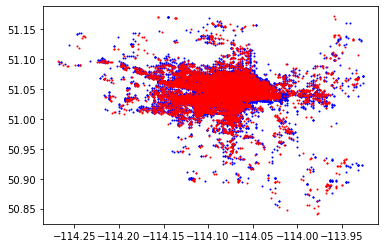

In [23]:
import matplotlib.pyplot as plt
import numpy as np
result_Y = (model.predict([X_test_set_fit[:,0:4],X_test_set_fit[:,4:]]))[0]

result_Y_plot = scy.inverse_transform(result_Y)
y_test_plot = scy.inverse_transform(Y_test_set_fit)

plt.scatter((y_test_plot[:,0]),(y_test_plot[:,1]), color='b', s= 1)
plt.scatter((result_Y_plot[:,0]), (result_Y_plot[:,1]), color='r', s= 1)



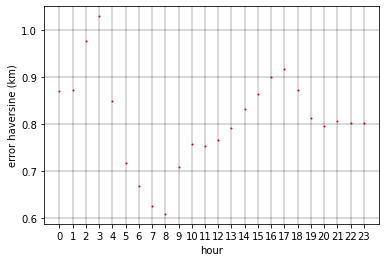

In [40]:
import matplotlib.pyplot as plt

plt.xlabel('hour')
plt.ylabel('error haversine (km)')
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.scatter(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'], mae_rate_hour[:,0], color='r', s= 1)



In [39]:
mae_rate_hour[:,0]

array([0.871068968217412, 0.8720279794520559, 0.9754311709601886,
       1.0289149339207044, 0.8490897802197803, 0.7179691027732465,
       0.6678776480938408, 0.6263700765938274, 0.6091453541364295,
       0.7078237547614759, 0.757880282457882, 0.7540867507955679,
       0.7656633917361597, 0.7920222225031602, 0.8315452297771639,
       0.863527180616745, 0.9003529987130001, 0.9164202007048549,
       0.8716387834345503, 0.8131412254935374, 0.7959604764624291,
       0.805495401133038, 0.8019631468903976, 0.8011648538306478],
      dtype=object)

In [35]:
sum(mae_rate_day)/len(mae_rate_day)

0.7836263814307702

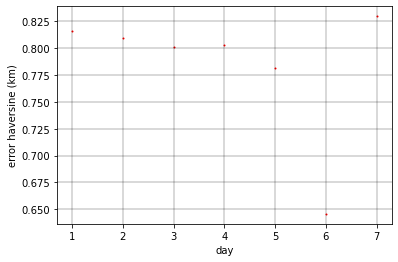

In [30]:
import matplotlib.pyplot as plt

plt.xlabel('day')
plt.ylabel('error haversine (km)')
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.scatter([1,2,3,4,5,6,7], mae_rate_day, color='r', s= 1)


In [1]:
mae_rate_day

NameError: name 'mae_rate_day' is not defined

In [2]:
sum(mae_rate_hour)/len(mae_rate_hour)

NameError: name 'mae_rate_hour' is not defined